# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import citipy
import seaborn as sns

# Import API key
#from api_keys import api_key
#import api_key from config
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint


# Range of latitudes and longitudes
lat_range = (-100, 100)
lng_range = (-200, 200)

## Generate Cities List

In [4]:

lat_lngs = []
cities = []

# set of random lat and lng 
lats = np.random.uniform(low=-100.000, high=100.000, size=1500)
lngs = np.random.uniform(low=-200.000, high=200.000, size=1500)
lat_lngs = zip(lats, lngs)

# nearest city for each lat, lng set
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # city must be  unique, add it to a our list
    if city not in cities:
        cities.append(city)


In [5]:
print(json.dumps(cities, indent=4, sort_keys=True))

[
    "kuche",
    "isangel",
    "tuktoyaktuk",
    "lompoc",
    "norman wells",
    "kapaa",
    "ushuaia",
    "jyvaskyla",
    "mar del plata",
    "jamestown",
    "kruisfontein",
    "esmeralda",
    "katsuura",
    "arawa",
    "trenggalek",
    "helong",
    "buqayq",
    "albany",
    "yellowknife",
    "leningradskiy",
    "barrow",
    "pout",
    "butaritari",
    "puerto escondido",
    "rikitea",
    "pangnirtung",
    "kavieng",
    "port alfred",
    "atuona",
    "lebu",
    "tiksi",
    "pevek",
    "mys shmidta",
    "asau",
    "san cristobal",
    "pacific grove",
    "mineiros",
    "ruatoria",
    "ilulissat",
    "new norfolk",
    "vaini",
    "saskylakh",
    "punta arenas",
    "lagoa",
    "hithadhoo",
    "barentsburg",
    "beringovskiy",
    "dikson",
    "taolanaro",
    "nchelenge",
    "nikolskoye",
    "tazovskiy",
    "ekibastuz",
    "marquette",
    "college",
    "kasama",
    "hermanus",
    "hasaki",
    "adra",
    "yagodnoye",
    "menongue",

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+"ab45b0a48d13443fd73f346cca3a479b"

In [7]:



# Create empty lists to append the API data into lists 
city_name = []
country = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []


record = 1


print(f"Beginning Data Retrieval")


#Loop through the cities in the city list 
for city in cities:  
    
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(5)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
City not found. Skipping...
Processing Record 1 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=isangel
Processing Record 2 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=tuktoyaktuk
Processing Record 3 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=lompoc
Processing Record 4 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=norman wells
Processing Record 5 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=kapaa
Processing Record 6 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=ushuaia
City not found. Skipping...
Processing Record 7 | Mar del Plata
http://api.openweathermap

Processing Record 56 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=los llanos de aridane
Processing Record 57 | Kushchevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=kushchevskaya
Processing Record 58 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=qaanaaq
City not found. Skipping...
City not found. Skipping...
Processing Record 59 | Ouegoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=ouegoa
Processing Record 60 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=hobart
Processing Record 61 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=victoria
Processing Record 62 | Ribeira Grande
http://api.openw

Processing Record 111 | Katima Mulilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=katima mulilo
Processing Record 112 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=mahebourg
Processing Record 113 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=touros
Processing Record 114 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=airai
Processing Record 115 | Bhachau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=bhachau
Processing Record 116 | Manbij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=manbij
Processing Record 117 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a4

Processing Record 166 | Borogontsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=borogontsy
Processing Record 167 | Sarangani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=sarangani
Processing Record 168 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=port macquarie
Processing Record 169 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=saint-joseph
Processing Record 170 | Nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=nhulunbuy
Processing Record 171 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=sorong
Processing Record 172 | Eston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a4

Processing Record 220 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=aksu
Processing Record 221 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=cockburn town
Processing Record 222 | Turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=turayf
Processing Record 223 | Sandnessjoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=sandnessjoen
Processing Record 224 | Kavos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=kavos
City not found. Skipping...
Processing Record 225 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=narsaq
Processing Record 226 | Frederico Westphalen
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 276 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=constitucion
Processing Record 277 | Aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=aripuana
Processing Record 278 | Kerema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=kerema
City not found. Skipping...
Processing Record 279 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=alice springs
Processing Record 280 | Victoria Point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=victoria point
Processing Record 281 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=saint-augustin
Processing Record 282 | Coruripe
http://api.openweathermap.org/d

Processing Record 332 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=ixtapa
Processing Record 333 | West Richland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=west richland
Processing Record 334 | Lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=lagos
Processing Record 335 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=auki
City not found. Skipping...
City not found. Skipping...
Processing Record 336 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=faanui
Processing Record 337 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=bereda
Processing Record 338 | Panguna
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 387 | Pavilosta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=pavilosta
Processing Record 388 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=saint-pierre
Processing Record 389 | Monroe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=monroe
Processing Record 390 | Talara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=talara
Processing Record 391 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=zhigansk
Processing Record 392 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=biak
Processing Record 393 | Oltedal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=o

Processing Record 442 | Oulainen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=oulainen
Processing Record 443 | Mangaldai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=mangaldai
Processing Record 444 | Safranbolu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=safranbolu
City not found. Skipping...
Processing Record 445 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=praia
Processing Record 446 | Mae Sot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=mae sot
Processing Record 447 | Leningradskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ab45b0a48d13443fd73f346cca3a479b&q=leningradskaya


In [8]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":lat, 
    "Longitude":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          447
Cloudiness    447
Country       447
Date          447
Humidity      447
Latitude      447
Longitude     447
Max Temp      447
Wind Speed    447
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Save data frame to CSV
#weather_data.to_csv('Output_CSV/weather_data.csv')

In [10]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Isangel,40,VU,1573168831,69,-19.55,169.27,80.6,9.17
1,Tuktoyaktuk,90,CA,1573168836,72,69.44,-133.03,15.8,9.17
2,Lompoc,40,US,1573168841,77,34.64,-120.46,73.4,8.05
3,Norman Wells,75,CA,1573168846,84,65.28,-126.83,8.6,11.41
4,Kapaa,20,US,1573168851,58,22.08,-159.32,84.2,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

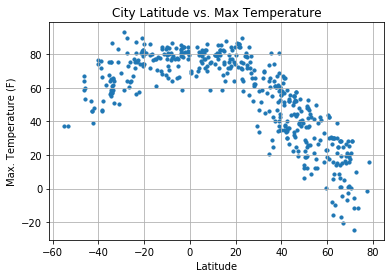

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Humidity Plot

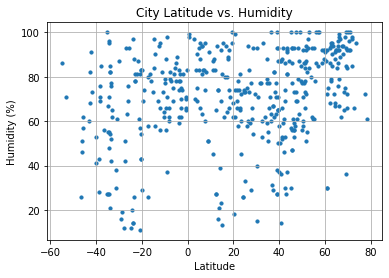

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

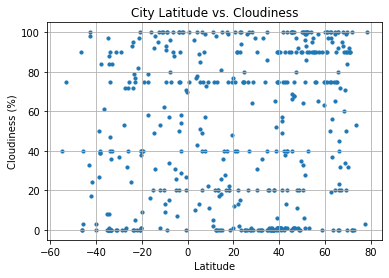

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

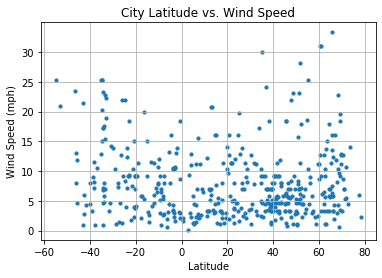

In [23]:
 #Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

In [24]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"